## Используемые библиотеки

In [229]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

## Нужные функции

In [230]:
def f(y,x):
    return (np.cos(y)) / (1 + x) + 0.5 * y

def eilerMethod(y, x, h):
    for i in range(1, x.size):
        y[i] = y[i-1] + h * f(y[i-1] + h/2 * f(y[i-1], x[i-1]), x[i-1] + h/2)
    return y 

def richardson(y_h, y_h_2, s, y_rev):
    for i in range(y_h.size):
        r_m = (y_h_2[2*i] - y_h[i]) / (pow(2, s) - 1)
        y_rev[i] = (y_h_2[2*i] + r_m)
    return y_rev

def rungekutt(x, y_RK, h):
    for i in range(0,x.size - 1):
        k1 = h * f(y_RK[i], x[i])
        k2 = h * f(y_RK[i] + k1/2, x[i] + h/2)
        k3 =  h * f(y_RK[i] + k2/2, x[i] + h/2)
        k4 =  h * f(y_RK[i] + k3, x[i] + h)
        y_RK[i+1] = y_RK[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y_RK

def calculate_q(q, y, x, h):
    for i in range(x.size):
        q[i] = h * f(y[i], x[i])
    return q

def adamsMethod(x, y_AD_ex, h, q):
    for i in range(0, x.size - 1):
        y_AD_ex[i+1] = (y_AD_ex[i] + 1.0/720 * (1901 * q[i + 4] - 2774 * q[i + 3] +2616 * q[i + 2] - 1274 * q[i + 1] + 251 * q[i]))
        q[i + 5] = h * f(y_AD_ex[i + 1], x[i + 1])
    return y_AD_ex

def adamsMethodIn(y_AD_in, h, q):
    for i in range(0, y_AD_in.size - 1):
        y_AD_in[i+1] = y_AD_in[i] + 1.0/720 * (251 * q[i + 4] + 646 * q[i + 3] - 264 * q[i + 2] + 106 * q[i + 1] - 19 * q[i])
    return y_AD_in

## Задания


<img src='task.PNG'>

### Выполнения заданий по пунктам


<img src='1).PNG'>

In [231]:
y0 = 0
h = 0.05
x = np.arange(0,0.55, h)
y = odeint(f,y0,x).T.flatten()
d = {'x': x, 'y': y}
df_1 = pd.DataFrame(data=d)
df_1.head(11)

,x,y
0,0.00,0.000000
1,0.05,0.049390
2,0.10,0.097621
3,0.15,0.144775
4,0.20,0.190931
5,0.25,0.236164
6,0.30,0.280541
7,0.35,0.324128
8,0.40,0.366984
9,0.45,0.409168


<img src='2).PNG'>

##### пункт a)

In [232]:
y0 = 0
h = 0.05
x = np.arange(0,0.55, h)
y_h = np.zeros(x.size)


y_h = eilerMethod(y_h, x, h)

d = {'x': x, 'y_h': y_h}
df_2 = pd.DataFrame(data=d)
df_2.head(11)

,x,y_h
0,0.00,0.000000
1,0.05,0.049390
2,0.10,0.097620
3,0.15,0.144774
4,0.20,0.190929
5,0.25,0.236161
6,0.30,0.280537
7,0.35,0.324122
8,0.40,0.366977
9,0.45,0.409160


##### пункт б)

In [233]:
y0 = 0
h = 0.025
x_h_2 = np.arange(0,0.55, h)
y_h_2 = np.zeros(x_h_2.size)

y_h_2 = eilerMethod(y_h_2, x_h_2 , h)

d = {'x': x_h_2 , 'y_h_2': y_h_2}
df_2 = pd.DataFrame(data=d)
df_2.head(21)

,x,y_h_2
0,0.000,0.000000
1,0.025,0.024846
2,0.050,0.049390
3,0.075,0.073645
4,0.100,0.097620
5,0.125,0.121327
6,0.150,0.144774
7,0.175,0.167973
8,0.200,0.190931
9,0.225,0.213658


##### пункт в)

In [234]:
y_rev = np.zeros(x.size)
s = 2
y_rev = richardson(y_h, y_h_2, s, y_rev)

d = {'y_rev': y_rev}
df_2 = pd.DataFrame(data=d)
df_2.head(11)

,y_rev
0,0.000000
1,0.049390
2,0.097620
3,0.144775
4,0.190931
5,0.236164
6,0.280541
7,0.324128
8,0.366984
9,0.409168


<img src='3).PNG'>

In [235]:
y_h_2_resize = np.zeros(x.size)

for i in range(y_h_2_resize.size):
    y_h_2_resize[i] = y_h_2[2*i]

d = {'y_math': y, 'y_h': y_h, 'y_h_2': y_h_2_resize, 'y_rev': y_rev, 'y_rev - y_math': y_rev - y}
df_3 = pd.DataFrame(data=d)
df_3.head(11)

,y_math,y_h,y_h_2,y_rev,y_rev - y_math
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.049390,0.049390,0.049390,0.049390,-1.438546e-09
2,0.097621,0.097620,0.097620,0.097620,-1.345819e-08
3,0.144775,0.144774,0.144774,0.144775,-2.972956e-08
4,0.190931,0.190929,0.190931,0.190931,-4.136051e-08
5,0.236164,0.236161,0.236163,0.236164,-5.575711e-08
6,0.280541,0.280537,0.280540,0.280541,-5.707633e-08
7,0.324128,0.324122,0.324126,0.324128,-6.231925e-08
8,0.366984,0.366977,0.366982,0.366984,-6.822152e-08
9,0.409168,0.409160,0.409166,0.409168,-7.373553e-08


<img src='4).PNG'>

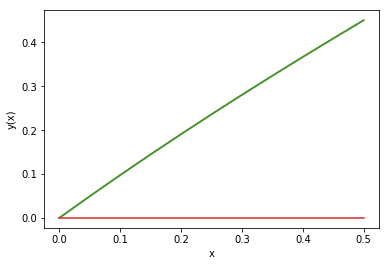

In [236]:
plt.plot(x, y)
plt.plot(x, y_rev)
plt.plot(x, y_h_2_resize)
plt.plot(x, y_rev - y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()


In [237]:
df_3.describe()

,y_math,y_h,y_h_2,y_rev,y_rev - y_math
count,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,0.231858,0.231854,0.231857,0.231858,-4.380731e-08
std,0.149277,0.149274,0.149276,0.149277,2.866374e-08
min,0.000000,0.000000,0.000000,0.000000,-7.878388e-08
25%,0.121198,0.121197,0.121197,0.121198,-6.527038e-08
50%,0.236164,0.236161,0.236163,0.236164,-5.575711e-08
75%,0.345556,0.345550,0.345554,0.345556,-2.159388e-08
max,0.450733,0.450723,0.450730,0.450732,0.000000e+00


<img src='5).PNG'>

In [238]:
y0 = 0
h = 0.05
x = np.arange(0,0.55, h)
y_RK = np.zeros(x.size)

y_RK = rungekutt(x, y_RK, h)

d = {'x': x, 'y_RK': y_RK}
df_5 = pd.DataFrame(data=d)
df_5.head(11)

,x,y_RK
0,0.00,0.000000
1,0.05,0.049390
2,0.10,0.097621
3,0.15,0.144775
4,0.20,0.190931
5,0.25,0.236164
6,0.30,0.280541
7,0.35,0.324128
8,0.40,0.366984
9,0.45,0.409168


<img src='6).PNG'>

In [239]:
y0 = 0
h = 0.05
x_AD_ex = np.arange(4*h,0.55, h)
y_AD_ex = np.zeros(x_AD_ex.size)

x_help = np.arange(0,0.25, h)
y_help = np.zeros(x_help.size)
q = np.zeros(x.size)

y_help = rungekutt(x_help, y_help, h)
q = calculate_q(q, y_help, x_help, h)
y_AD_ex[0] = y_help[4]

y_AD_ex = adamsMethod(x_AD_ex, y_AD_ex, h, q)

d = {'x_AD_ex': x_AD_ex, 'y_AD_ex': y_AD_ex}
df_6 = pd.DataFrame(data=d)
df_6.head(11)

,x_AD_ex,y_AD_ex
0,0.20,0.190931
1,0.25,0.236164
2,0.30,0.280541
3,0.35,0.324128
4,0.40,0.366984
5,0.45,0.409168
6,0.50,0.450733


<img src='7).PNG'>

In [240]:
y0 = 0
h = 0.05
x_AD_in = np.arange(4*h,0.55, h)
y_AD_in = np.zeros(x_AD_ex.size)

x_help = np.arange(0,0.55, h)
y_help = np.zeros(x_help.size)
q = np.zeros(x.size)

y_help = rungekutt(x_help, y_help, h)
q = calculate_q(q, y_help, x_help, h)
y_AD_in[0] = y_help[4]

y_AD_in = adamsMethodIn(y_AD_in, h, q)

d = {'x_AD_in': x_AD_in, 'y_AD_in': y_AD_in}
df_6 = pd.DataFrame(data=d)
df_6.head(11)

,x_AD_in,y_AD_in
0,0.20,0.190931
1,0.25,0.237088
2,0.30,0.282321
3,0.35,0.326698
4,0.40,0.370284
5,0.45,0.413141
6,0.50,0.455324


<img src='8).PNG'>

In [241]:
y_math = y[4:]
y_RK = y_RK[4:]
d = {'y_math - y_RK': y_math - y_RK, 'y_math - y_AD_ex': y_math - y_AD_ex, 'y_math - y_AD_in': y_math - y_AD_in}
df_8 = pd.DataFrame(data=d)
df_8.head(11)

,y_math - y_RK,y_math - y_AD_ex,y_math - y_AD_in
0,-1.373516e-08,-1.373516e-08,-1.373516e-08
1,-9.777095e-09,-3.746089e-08,-9.241089e-04
2,-1.784617e-08,-6.838101e-08,-1.779433e-03
3,-2.106101e-08,-8.915603e-08,-2.570182e-03
4,-2.279410e-08,-1.060838e-07,-3.300207e-03
5,-2.419040e-08,-1.201368e-07,-3.973034e-03
6,-2.541463e-08,-1.321262e-07,-4.591896e-03
